In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, precision_score, recall_score, roc_auc_score, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics
from statsmodels.tools import eval_measures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
spotify_dataset = pd.read_csv (r"C:\Users\Matías\Documents\DH\SPOTIFY\spotify_dataset.csv")

In [3]:
spotify_dataset.head(50)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db


In [4]:
print("Cantidad de filas: " + str(spotify_dataset.shape[0]))
print("Cantidad de columnas: " + str(spotify_dataset.shape[1]))
print("-------------------------------\n")
print("Cantidad de valores nulos:\n")
print(spotify_dataset.isnull().sum())
print("-------------------------------\n")
print("Tipos de datos:\n")
spotify_dataset.dtypes

Cantidad de filas: 1556
Cantidad de columnas: 23
-------------------------------

Cantidad de valores nulos:

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64
-------------------------------

Tipos de datos:



Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [5]:
spotify_dataset.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [6]:
spotify_dataset = spotify_dataset.drop(['Index'], axis=1)

In [7]:
#Check duplicated rows
duplicado = spotify_dataset.duplicated()
print(duplicado.any())
print(spotify_dataset[duplicado])
print(spotify_dataset.shape)
spotify_dataset.drop_duplicates(inplace=True)
print(spotify_dataset.shape)

False
Empty DataFrame
Columns: [Highest Charting Position, Number of Times Charted, Week of Highest Charting, Song Name, Streams, Artist, Artist Followers, Song ID, Genre, Release Date, Weeks Charted, Popularity, Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, Duration (ms), Valence, Chord]
Index: []

[0 rows x 22 columns]
(1556, 22)
(1556, 22)


In [8]:
# Converting object columns to relevant float/int
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']
for each_col in object_cols:
    spotify_dataset[each_col] = pd.to_numeric(spotify_dataset[each_col], errors='coerce')
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Song Name                  1556 non-null   object 
 4   Streams                    1556 non-null   object 
 5   Artist                     1556 non-null   object 
 6   Artist Followers           1545 non-null   float64
 7   Song ID                    1556 non-null   object 
 8   Genre                      1556 non-null   object 
 9   Release Date               1556 non-null   object 
 10  Weeks Charted              1556 non-null   object 
 11  Popularity                 1545 non-null   float64
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float

In [9]:
Streams_clean = spotify_dataset.Streams.replace(',','', regex=True).values
Streams_clean

array(['48633449', '47248719', '40162559', ..., '4620876', '4607385',
       '4595450'], dtype=object)

In [10]:
spotify_dataset['Streams'] = Streams_clean.reshape(-1,1)
spotify_dataset.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [11]:
spotify_dataset['Streams'] = spotify_dataset['Streams'].astype(str).astype(float)
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Song Name                  1556 non-null   object 
 4   Streams                    1556 non-null   float64
 5   Artist                     1556 non-null   object 
 6   Artist Followers           1545 non-null   float64
 7   Song ID                    1556 non-null   object 
 8   Genre                      1556 non-null   object 
 9   Release Date               1556 non-null   object 
 10  Weeks Charted              1556 non-null   object 
 11  Popularity                 1545 non-null   float64
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float

In [12]:
spotify_dataset = spotify_dataset.rename(columns={'Highest Charting Position':'Highest_Charting_Position',
                                                  'Number of Times Charted':'Number_of_Times_Charted',
                                                  'Week of Highest Charting':'Week_of_Highest_Charting',
                                                  'Song_Name':'Song_Name',
                                                  'Artist Followers':'Artist_Followers',
                                                  'Release Date':'Release_Date',
                                                  'Weeks Charted':'Weeks_Charted',
                                                  'Duration (ms)': 'Duration_ms'})
spotify_dataset.columns

Index(['Highest_Charting_Position', 'Number_of_Times_Charted',
       'Week_of_Highest_Charting', 'Song Name', 'Streams', 'Artist',
       'Artist_Followers', 'Song ID', 'Genre', 'Release_Date', 'Weeks_Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration_ms', 'Valence', 'Chord'],
      dtype='object')

In [13]:
#Replacing Duration Miliseconds with seconds so they are on a more standard range
spotify_dataset['Duration_s'] = spotify_dataset['Duration_ms']/1000
spotify_dataset

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Song Name,Streams,Artist,Artist_Followers,Song ID,Genre,Release_Date,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Duration_s
0,1,8,2021-07-23--2021-07-30,Beggin',48633449.0,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B,211.560
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719.0,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db,141.806
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559.0,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A,178.147
3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456.0,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B,231.041
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454.0,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb,212.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,4630675.0,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A,209.320
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030.0,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B,181.930
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876.0,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D,217.307
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385.0,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,...,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F,152.784


In [14]:
spotify_dataset = spotify_dataset.drop(['Duration_ms'], axis=1)

In [15]:
spotify_dataset.isna().sum()

Highest_Charting_Position     0
Number_of_Times_Charted       0
Week_of_Highest_Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist_Followers             11
Song ID                       0
Genre                         0
Release_Date                  0
Weeks_Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Valence                      11
Chord                         0
Duration_s                   11
dtype: int64

In [16]:
#Dado que los valores nulos son pocos, decidimos eliminarlos para no tener inconvenientes con nuestros modelos de ML.
spotify_dataset = spotify_dataset.dropna()
spotify_dataset.isnull().sum()

Highest_Charting_Position    0
Number_of_Times_Charted      0
Week_of_Highest_Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist_Followers             0
Song ID                      0
Genre                        0
Release_Date                 0
Weeks_Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Valence                      0
Chord                        0
Duration_s                   0
dtype: int64

,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration_s
Highest_Charting_Position,1.000000,-0.417748,-0.295442,-0.233723,-0.164167,0.017149,0.063026,0.032166,0.041248,-0.012924,0.012718,0.026235,0.045362,-0.033956
Number_of_Times_Charted,-0.417748,1.000000,-0.060542,0.027458,0.232796,0.027026,-0.061139,0.031225,-0.060216,0.046651,-0.058436,-0.048307,0.021570,0.033980
Streams,-0.295442,-0.060542,1.000000,0.103251,0.123184,-0.081291,0.004145,-0.031155,-0.062620,0.034054,0.042105,0.053458,0.038381,0.015964
Artist_Followers,-0.233723,0.027458,0.103251,1.000000,0.104358,-0.097576,-0.065613,-0.033264,-0.072968,0.023830,-0.012491,-0.019881,-0.108804,0.142145
Popularity,-0.164167,0.232796,0.123184,0.104358,1.000000,0.028435,0.094691,0.158767,-0.032091,-0.091245,-0.029460,-0.024951,-0.000953,0.082096
Danceability,0.017149,0.027026,-0.081291,-0.097576,0.028435,1.000000,0.142130,0.234928,0.237394,-0.316798,-0.114518,-0.040219,0.361627,-0.101390
Energy,0.063026,-0.061139,0.004145,-0.065613,0.094691,0.142130,1.000000,0.732616,0.023989,-0.542399,0.124693,0.113352,0.356325,0.056624
Loudness,0.032166,0.031225,-0.031155,-0.033264,0.158767,0.234928,0.732616,1.000000,-0.018823,-0.477431,0.043141,0.104371,0.298762,0.075262
Speechiness,0.041248,-0.060216,-0.062620,-0.072968,-0.032091,0.237394,0.023989,-0.018823,1.000000,-0.131436,0.072774,0.111255,0.038032,-0.089895
Acousticness,-0.012924,0.046651,0.034054,0.023830,-0.091245,-0.316798,-0.542399,-0.477431,-0.131436,1.000000,-0.005469,-0.061632,-0.096997,-0.046010


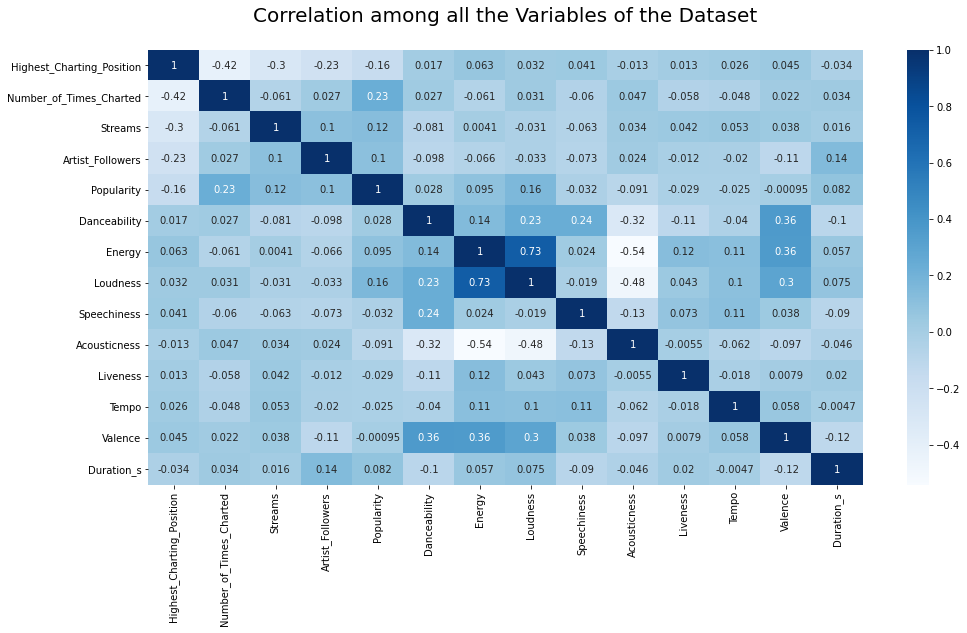

In [17]:
#Checking relationship between variables
#Heatmap
cor=spotify_dataset.corr()
plt.figure(figsize=(16,8), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, cmap="Blues")
plt.title("Correlation among all the Variables of the Dataset\n", size=20)
cor

In [18]:
'Artist_Followers','Popularity','Daceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Duration_s'

('Artist_Followers',
 'Popularity',
 'Daceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Valence',
 'Duration_s')

In [19]:
spotify_dataset.describe()

,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Duration_s
count,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,87.825243,10.684142,6.337136e+06,1.471690e+07,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,0.514704,197.940817
std,58.132046,16.389761,3.375402e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,0.227326,47.148930
min,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,0.032000,30.133000
25%,37.000000,1.000000,4.915080e+06,2.123734e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,0.343000,169.266000
50%,80.000000,4.000000,5.269163e+06,6.852509e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,0.512000,193.591000
75%,137.000000,12.000000,6.452492e+06,2.269875e+07,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,0.691000,218.902000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,0.979000,588.139000


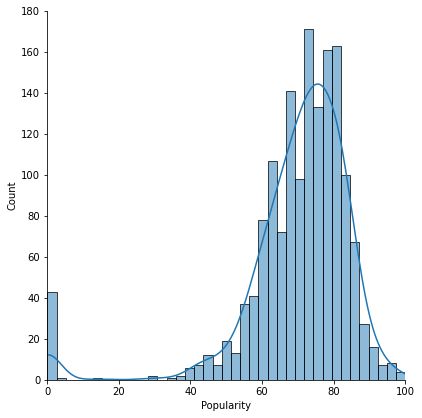

In [20]:
#Observamos que la mayor parte de los artistas de nuestro ranking son populares. 
Popularity_displot = sns.displot(spotify_dataset, x='Popularity', kde=True)
Popularity_displot.set(xlim=(0,100))
Popularity_displot.set(ylim=(0, 180))
Popularity_displot.fig.set_figwidth(6)
Popularity_displot.fig.set_figheight(6)

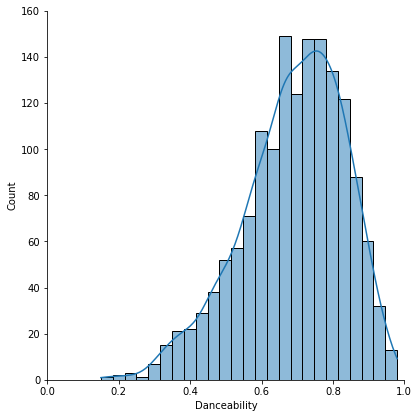

In [21]:
#Observamos que la mayor parte de las canciones son altamente bailables.
Danceability_displot = sns.displot(spotify_dataset, x='Danceability', kde=True)
Danceability_displot.set(xlim=(0,1))
Danceability_displot.set(ylim=(0, 160))
Danceability_displot.fig.set_figwidth(6)
Danceability_displot.fig.set_figheight(6)

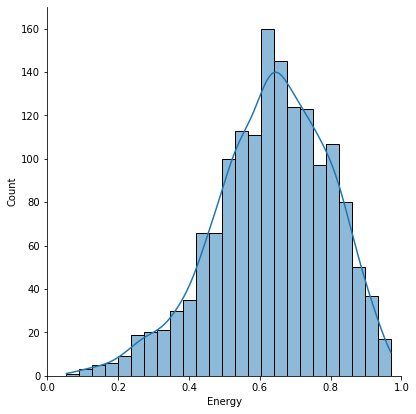

In [22]:
#Observamos que la mayor parte de las canciones son enérgicas.
Energy_displot = sns.displot(spotify_dataset, x='Energy', kde=True)
Energy_displot.set(xlim=(0,1))
Energy_displot.set(ylim=(0, 170))
Energy_displot.fig.set_figwidth(6)
Energy_displot.fig.set_figheight(6)

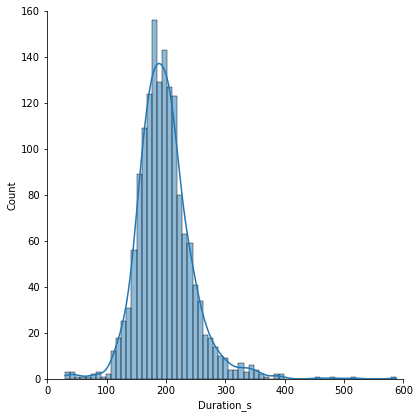

In [23]:
#Observamos que la mayor parte de las canciones tienen una duración similar.
Duration_displot = sns.displot(spotify_dataset, x='Duration_s', kde=True)
Duration_displot.set(xlim=(0,600))
Duration_displot.set(ylim=(0, 160))
Duration_displot.fig.set_figwidth(6)
Duration_displot.fig.set_figheight(6)

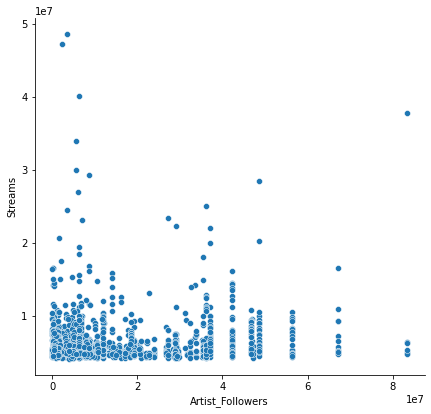

In [24]:
#La cantidad de seguidores no parece tener gran influencia en el puesto de más escuchas
followers_position = sns.relplot(x = "Artist_Followers", y = "Streams", data = spotify_dataset)
followers_position.fig.set_figwidth(6)
followers_position.fig.set_figheight(6)

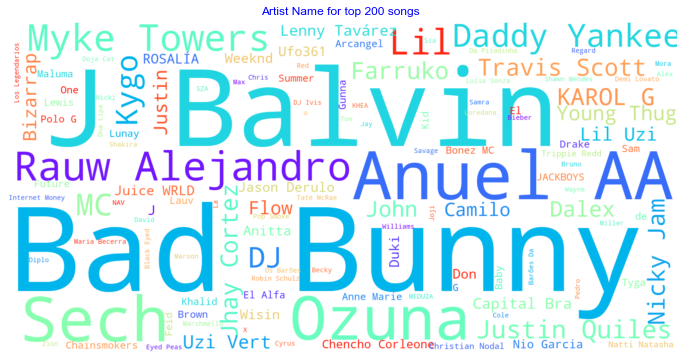

In [50]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = spotify_dataset["Artist"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 200 songs ",color='b')
plt.show()

## Genre

In [26]:
#Segmentamos la cantidad de streams en distintas categorías 
streams_segment = spotify_dataset['Streams']
streams1 = (streams_segment <= 10000000) & (streams_segment >=0)
streams2 = (streams_segment <= 20000000) & (streams_segment >=10000000)
streams3 = (streams_segment <= 30000000) & (streams_segment >=20000000)
streams4 = (streams_segment <= 40000000) & (streams_segment >=30000000)
streams5 = (streams_segment <= 50000000) & (streams_segment >=40000000)


In [27]:
streams_categories = np.array(['streams1','streams2','streams3','streams4','streams5'])
streams_categories

array(['streams1', 'streams2', 'streams3', 'streams4', 'streams5'],
      dtype='<U8')

## Hipótesis

* ¿Hay alguna relación entre la variable objetivo y todas las variables explicativas?

* Nuestra variable OBJETIVO es la cantidad de streams 

#### Estandarizamos nuestras features

In [28]:
#Lo que hicimos fue crear un dataset diferente, esta vez estandarizado. Este DataSet lo nombramos std_spotify

features = ['Artist_Followers','Popularity','Danceability',
            'Energy','Loudness','Speechiness','Acousticness',
            'Liveness','Tempo','Valence','Duration_s']

X = spotify_dataset[features]
scaler = MinMaxScaler()
scaler.fit(X)
std_features = scaler.transform(X)
std_spotify = pd.DataFrame(std_features)
std_spotify.columns = [i + '_std' for i in features]
std_spotify

,Artist_Followers_std,Popularity_std,Danceability_std,Energy_std,Loudness_std,Speechiness_std,Acousticness_std,Liveness_std,Tempo_std,Valence_std,Duration_s_std
0,0.040475,1.00,0.679518,0.814410,0.763187,0.031599,0.127744,0.360076,0.550500,0.588173,0.325134
1,0.026702,0.99,0.531325,0.775109,0.737844,0.029159,0.038507,0.088401,0.777085,0.470961,0.200129
2,0.075140,0.99,0.497590,0.665939,0.754339,0.151952,0.337005,0.069192,0.758164,0.692714,0.265255
3,0.999467,0.98,0.792771,0.920306,0.804274,0.013476,0.047159,0.365383,0.500196,0.590285,0.360046
4,0.065625,0.96,0.706024,0.709607,0.665679,0.044493,0.020397,0.032261,0.651368,0.910243,0.325923
...,...,...,...,...,...,...,...,...,...,...,...
1540,0.325955,0.79,0.737349,0.705240,0.717713,0.053671,0.002600,0.141462,0.437422,0.608237,0.321120
1541,0.180172,0.66,0.455422,0.890830,0.826354,0.071910,0.241429,0.332484,0.666347,0.720169,0.272035
1542,0.272328,0.81,0.740964,0.512009,0.780993,0.007900,0.185090,0.119176,0.367509,0.382260,0.335434
1543,0.002445,0.60,0.821687,0.541485,0.680037,0.041241,0.250484,0.172238,0.677031,0.896515,0.219802


#### Definimos nuestra variable Target : Streams

In [29]:
#Variable Target
y = spotify_dataset.Streams

#### Separamos el conjunto en Train y Test

In [30]:
#Para el conjunto de test utilizamos el %30 de nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

#### Ajustemos una regresión lineal múltiple con los datos del conjunto de entrenamiento usando statsmodels y evaluemos la significancia de cada uno de los coeficientes

In [31]:
#Aquí es importante revisar los P-Value
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.407
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           2.07e-08
Time:                        10:59:18   Log-Likelihood:                -17814.
No. Observations:                1081   AIC:                         3.565e+04
Df Residuals:                    1069   BIC:                         3.571e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.953e+06    1.6e+06      1.217      0.224    -1.2e+06     5.1e+06
Artist_Followers     0.0188      0.006      2.930      0.003       0.006       0.031
Popularity        3.393e+04   7024.651      4.829      0.000    2.01e+04    4.77e+04
Danceability     -1.832e+06   8.93e+05     -2.052      0.040   -3.58e+06   -8.04e+04
Energy            6.087e+05   1.11e+06      0.549      0.583   -1.57e+06    2.78e+06
Loudness         -1.454e+05   6.59e+04     -2.207      0.028   -2.75e+05   -1.61e+04
Speechiness      -1.714e+06   1.01e+06     -1.696      0.090    -3.7e+06     2.7e+05
Acousticness     -1.816e+04   5.45e+05     -0.033      0.973   -1.09e+06    1.05e+06
Liveness          1.221e+06    7.9e+05      1.545      0.123    -3.3e+05    2.77e+06
Tempo             6889.1729   3607.639      1.910      0.056    -189.684     1.4e+04
Valence           1.645e+06    5.5e+05      2.993      0.003    5.67e+05    2.72e+06
Duration_s         349.3371   2321.033      0.151      0.880   -4204.960    4903.635
==============================================================================
Omnibus:                     1132.897   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69908.823
Skew:                           5.014   Prob(JB):                         0.00
Kurtosis:                      41.099   Cond. No.                     4.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
no_reg_model_params = model.params

In [33]:
#Calculamos el error cuadrático medio en Train y Test con la finalidad de observar sus diferencias
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

3470991.525234768
2862976.4401019188


#### RMSE

La métrica más comúnmente utilizada para las tareas de regresión es el error cuadrático medio y representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado.
Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. El error cuadratico medio o RMSE es una medida absoluta de ajuste.

### Evaluando otras métricas

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regressor = LinearRegression()

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [38]:
MAE_train=mean_absolute_error(y_train,y_train_pred)
MAE_test=mean_absolute_error(y_test,y_test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

r2_train= metrics.r2_score(y_train,y_train_pred)
r2_test= metrics.r2_score(y_test,y_test_pred)

adj_r2_train = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train es:",MAE_train)
print("El MAE en test es:",MAE_test)
print("-------------------------------------------")
print("El RMSE en train es:",RMSE_train)
print("El RMSE en test es:",RMSE_test)
print("-------------------------------------------")
print("El r2 de train es:",r2_train)
print("El r2 de test es:",r2_test)
print("-------------------------------------------")
print("El r2 ajustado de train es:",adj_r2_train)
print("El r2 ajustado de test es:",adj_r2_test)

El MAE en train es: 1943464.7161389282
El MAE en test es: 1648308.8900788995
-------------------------------------------
El RMSE en train es: 3470991.5252347677
El RMSE en test es: 2862976.440129744
-------------------------------------------
El r2 de train es: 0.05270189024486727
El r2 de test es: 0.004866982397189301
-------------------------------------------
El r2 ajustado de train es: 0.04295420155702212
El r2 ajustado de test es: -0.01935085652677282


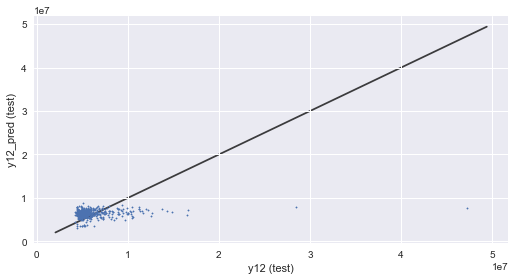

In [39]:
    plt.figure(figsize = (14,4))
   
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y12 (test)')
    plt.ylabel('y12_pred (test)')
    
    plt.tight_layout()
    plt.show()

## Regularización de Lasso

Ajustamos el modelo aplicando regularización de Lasso y validación cruzada para estimar el mejor valor de  𝛼

In [40]:
#Buscamos el Alfa que minimice el error cuadrático medio
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize = False, cv = 5) 

model_l = lm_lasso.fit(X_train, y_train)

model_l.score(X_train, y_train)

0.0527018878750769

In [41]:
model_l.coef_

array([ 1.88387098e-02,  3.39246126e+04, -1.83140792e+06,  6.08210099e+05,
       -1.45387888e+05, -1.71350387e+06, -1.78593785e+04,  1.22015402e+06,
        6.88912905e+03,  1.64497578e+06,  3.49559167e+02])

In [42]:
model_l.intercept_

1953617.2099008905

In [43]:
model_l.alpha_

10.0

* Probamos con muchísimos Alpha y ninguno mejoró la performance.

### Ridge

In [44]:
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                        normalize=True, cv=3) 


model_r = lm_ridge.fit(X_train, y_train)

print('Score model_r:', model_r.score(X_test, y_test))


Score model_r: 0.019618967702827228


In [45]:
model_r.coef_

array([ 9.82503347e-03,  1.60819326e+04, -8.95004159e+05,  2.91518313e+04,
       -3.69095908e+04, -9.00326016e+05,  1.75314562e+05,  6.32246853e+05,
        3.20946135e+03,  5.69852353e+05,  4.11743271e+02])

In [46]:
model_r.intercept_

4693135.779915905

In [47]:
lm_ridge.alpha_

1.0

### Partial conclusion:

We use the variables Artist_Followers, Popularity, Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, Valence, Duration_s, in order to observe if there is a linear correlation between them and the amount of Streams.

This analysis could not determine that there is some type of combination between these variables that is sufficient to explain the success of a song based on the number of Streams.

Therefore, a new question arises: what factor or factors influence a song to be successful?